In this nlp project only tasks will be performed. To obtain detailed information on NLP processes, please visit "https://github.com/efeyilmaz25/Sentiment-Analysis-for-KOSMOS-Amazon-Reviews/blob/main/Sentiment_Analysis_for_KOSMOS_Amazon_Reviews.ipynb".

# **Business Problem**

Performing text pre-processing, cleaning and visualization studies from Wikipedia sample data.

# **Data-Set Story**

It contains texts taken from Wikipedia data.

# **Tasks**

Task 1: Write a function that will perform pre-processing operations on the text.

* Convert upper and lower case letters.
* Remove punctuation marks.
* Remove the numerical expressions.

Task 2: Write a function that will remove unimportant words when extracting features from the text.

Task 3: Find less recurring words in the text.

Task 4: Remove less repetitive words from the text. (Hint: use the lambda function.)

Task 5: Tokenize the texts and observe the results.

Task 6: Perform the lemmatization process.

Task 7: Calculate the frequencies of the terms in the text. (Hint: Required for barplot chart)

Task 8: Create the barplot chart.

Task 9: Write all the stages as a single function.

* Perform text preprocessing operations.
* Write 'docstring' describing the function.

# **Text Pre-Processing**

We must standardize the texts. In texts where some letters are uppercase and some are lowercase, the first action may be to reduce or enlarge the entire text. This process is called **normalization**. There may also be variables that we would like to exclude from the study. For example: we may want to delete expressions that do not carry any measurement value, such as **numbers**, **punctuation marks** or **stop words** that are commonly used in the language ("is", "that", "for" ...).

**Note:** Studies in the field of natural language processing are as closed to generalizations as possible. It may be necessary to keep some expressions in the text within the scope of the subject of interest.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob

To avoid seeing some "warning" outputs;

In [21]:
from warnings import filterwarnings
filterwarnings('ignore')

Let's set certain display options using the Pandas library.

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Let's read our relevant dataset and create a pandas dataframe. Here the first column refers to the indexes.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wiki_data.csv", index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To shorten processing times and improve performance, let's take the first 2000 observations of our dataset

In [24]:
df = df[:2000]

In [25]:
df.head()

text
1  Anovo\n\nAnovo (formerly A Novo) is a computer...
2  Battery indicator\n\nA battery indicator (also...
3  Bob Pease\n\nRobert Allen Pease (August 22, 19...
4  CAVNET\n\nCAVNET was a secure military forum w...
5  CLidar\n\nThe CLidar is a scientific instrumen...

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [27]:
df.shape

(2000, 1)

Let's create our function that will perform text pre-processing operations. As mentioned before, please visit the "https://github.com/efeyilmaz25/Sentiment-Analysis-for-KOSMOS-Amazon-Reviews/blob/main/Sentiment_Analysis_for_KOSMOS_Amazon_Reviews.ipynb". for detailed information.

Let's continue by removing the **punctuation marks**. This can be done by writing **regular expression**. By hovering over the texts, we can inform them that a string expression is a punctuation mark and replace the points we capture with spaces.

**Regular expression** is a special structure used for pattern matching in textual expressions, that is, to capture and work on a certain pattern.

Since the **numbers** are assumed to have no measurement value, they must be discarded.

**Note:** In terms of the features you will derive specifically for the work you are doing, features such as the abundance of numerical expressions in certain texts may have various distinctiveness.


In [28]:
def clean_text(text):
    text = text.str.lower() # ----- Normalizing
    text = text.str.replace(r'[^\w\s]', '') # ----- Punctuations
    text = text.str.replace("\n" , '')
    text = text.str.replace('\d', '') # ----- Number
    return text

df["text"] = clean_text(df["text"])

In [29]:
df.head(10)

text
1   anovoanovo (formerly a novo) is a computer ser...
2   battery indicatora battery indicator (also kno...
3   bob peaserobert allen pease (august 22, 1940â ...
4   cavnetcavnet was a secure military forum which...
5   clidarthe clidar is a scientific instrument us...
6   capacity losscapacity loss or capacity fading ...
7   carbon recycling internationalcarbon recycling...
8   chemical agent resistant coatingchemical agent...
9   claas cougarthe claas cougar is a self-propell...
10  conductive polymerconductive polymers or, more...

let's complete mission 2. **"Stop words"** refer to words that have no meaning and are commonly used in the language. It means deleting expressions such as "for", "is", "the", "or" ... since they do not have a measurement value.

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

df["text"] = remove_stopwords(df["text"])

Let's accomplish task 3. Let's find rare words. Then let's remove it from the data set. We can deal with the removal of **rare words**. This process may not be included in the general NLP flow. When we focus on words to perform modeling operations, it is generally undesirable to keep rarely mentioned words in the study. Our aim is to exclude words that occur rarely in the relevant text, assuming that they will not form a certain pattern.

In [32]:
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

1863;              1
prentice           1
guncotton.small    1
wolfsberg          1
lenk               1
                  ..
m.52               1
sub-sonic          1
attlee's           1
1949.the           1
fluids/solids      1
Name: count, Length: 1000, dtype: int64

In [33]:
delete = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

Let's tokenize the texts. For this part, we can finally deal with the process of separating words into their roots. For example, it is the elimination of the 's suffixes at the end of words. If we consider the issue from a Turkish perspective; It is the process of reducing the words "kitapçı", "kitaplık" and "kitaplar" to the word "kitap".

In [34]:
nltk.download('punkt')
df["text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, 22, 1...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frank-kamenetskii, theoryin, combustion, fran...
Name: text, Length: 2000, dtype: object

Let's do the lemmatization process.

In [35]:
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Text Visualization**

**Text visualization** operations are very important. Texts must first be represented numerically. In these processes, the frequencies of the words are calculated; **Column charts** and **word clouds** can be created. We can also use methods that can be used to visualize some categorical variables. First, let's create a **column chart**.

In [36]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()


In [37]:
tf.head()

index        0
0     company 1862.000
1  anovoanovo    1.000
2         1.6    3.000
3        four  473.000
4        year  907.000

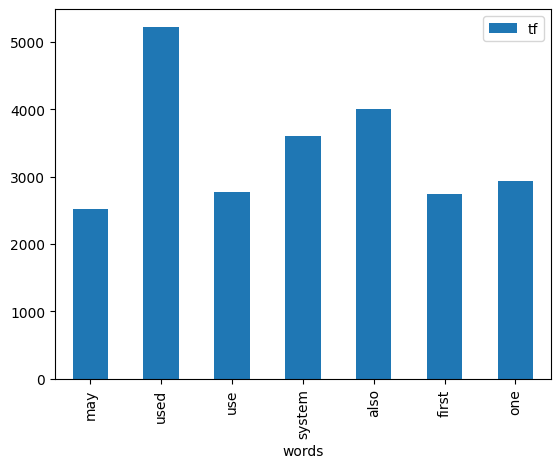

In [38]:
tf.columns = ["words", "tf"]
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

Let's create a **word cloud** as the final process for this part. Word cloud is the process of creating visuals in a cloud according to the frequency of occurrence of words in the relevant text. To achieve this, we must express the entire text in a single text file as a single text.

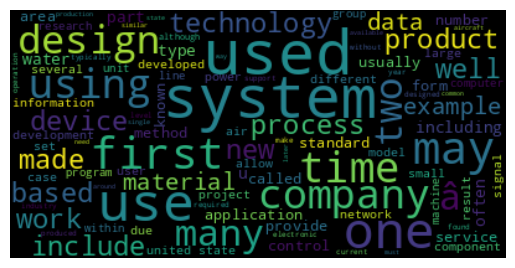

In [39]:
text = " ".join(i for i in df["text"])
wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now let's complete task 9 and write all the stages as a single function.

In [44]:
def wiki_preprocess(text, barplot=False, wordcloud=False):

    nltk.download('stopwords')

    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace("\n", '')
    text = text.str.replace('\d', '')
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    delete = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in delete))


    if barplot:
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        tf.columns = ["words", "tf"]
        tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
        plt.show()

    if wordcloud:
        text = " ".join(i for i in text)
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return text

In [45]:
wiki_preprocess(df["text"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1       anovoanovo (formerly novo) computer service co...
2       battery indicatora battery indicator (also kno...
3       bob peaserobert allen pea (august 22, 1940â â€...
4       cavnetcavnet secure military forum became oper...
5       clidarthe clidar scientific instrument used me...
                              ...                        
1996    edinburgh calotype clubthe edinburgh calotype ...
1997    endrinendrin organochloride chemical formula c...
1998    ethylene glycol dinitrateethylene glycol dinit...
1999    forge de syamthe forge de syam (syam forges) f...
2000    frank-kamenetskii theoryin combustion, frank-k...
Name: text, Length: 2000, dtype: object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


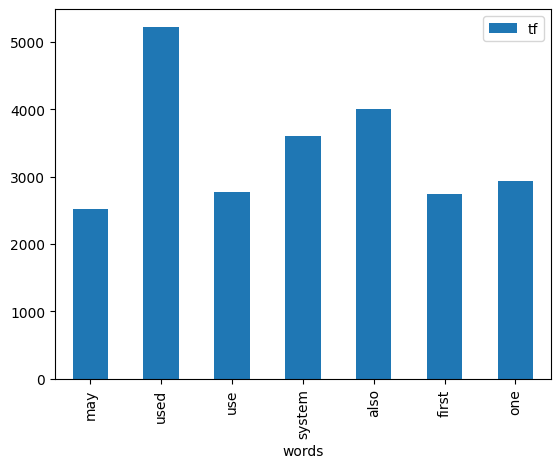

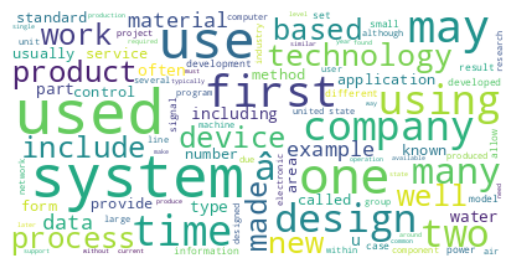

'anovoanovo (formerly novo) computer service company based beauvais, france. founded 1987, went public 1999, currently member cac small.it category \'service repair\' mobile news award four year row, 2007 2010.as november 2017, score 1.6 10 trustpilot rating site, 86% reviewer giving company lowest possible rating. battery indicatora battery indicator (also known battery gauge) device give information battery. usually visual indication battery\'s state charge. particularly important case battery electric vehicle.some automobile fitted battery condition meter monitor starter battery. meter is, essentially, voltmeter may also marked coloured zone easy visualization. many newer car longer offer voltmeter ammeters; instead, vehicle typically light outline automotive battery it. somewhat misleading may confused indicator bad battery reality indicates problem vehicle\'s charging system. alternatively, ammeter may fitted. indicates whether battery charged discharged. adjacent picture, ammeter

In [46]:
wiki_preprocess(df["text"], True, True)